<a href="https://colab.research.google.com/github/jaymalak/Gender-recognition-by-voice/blob/master/Gender_recognition_by_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GENDER RECOGNITION BY VOICE
  

## 1. Objective

To Identify the Gender with corresponding voice

##2. Data Loading and Description


####Importing Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb
# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [0]:
dtvoice = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv', index_col=0)
dtvoice.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,,,,,,,,,,,,,,,,,,,,
0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [0]:
dtvoice.shape

(3168, 20)

Dataset consider under study consits of 3168 observations and 20 variables / features

## 3. Visualisation of Data

In [0]:
dtvoice.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3168 entries, 0.0597809849598081 to 0.16550894600183702
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sd        3168 non-null   float64
 1   median    3168 non-null   float64
 2   Q25       3168 non-null   float64
 3   Q75       3168 non-null   float64
 4   IQR       3168 non-null   float64
 5   skew      3168 non-null   float64
 6   kurt      3168 non-null   float64
 7   sp.ent    3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  centroid  3168 non-null   float64
 11  meanfun   3168 non-null   float64
 12  minfun    3168 non-null   float64
 13  maxfun    3168 non-null   float64
 14  meandom   3168 non-null   float64
 15  mindom    3168 non-null   float64
 16  maxdom    3168 non-null   float64
 17  dfrange   3168 non-null   float64
 18  modindx   3168 non-null   float64
 19  label     3168 non-null   object 
d

All data is in numberic format except label column which is our target variable (which we have to predict)

In [0]:
dtvoice.describe()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Let's check correlation between all variables

In [0]:
dtcorr = dtvoice.corr()
dtcorr

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
sd,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477
mode,-0.529150,0.677433,0.591277,0.486857,-0.403764,-0.434859,-0.406722,-0.325298,-0.485913,1.000000,0.687715,0.324771,0.385467,0.172329,0.491479,0.198150,0.477187,0.473775,-0.182344


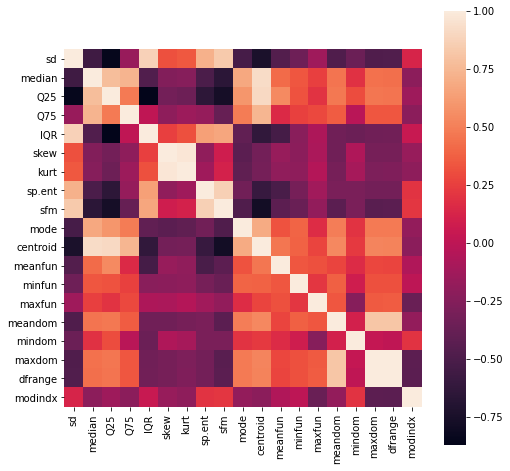

In [0]:
# plot correlation matrix
f, ax = plt.subplots(figsize = (8,8))
# Draw the heatmap using seaborn
sns.heatmap(dtcorr, square = True)
plt.show()

Let's check Variables with NULL values

In [0]:
##missing data 
total = dtvoice.isnull().sum().sort_values(ascending=False)
percent = (dtvoice.isnull().sum()/dtvoice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.query('Total > 0')

,Total,Percent


No missing values found in data

Let's check count of records of male and female, avaialble for study

In [0]:
dtvoice['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

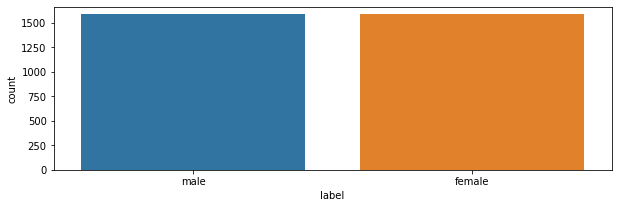

In [0]:
##dtvoice['label'].value_counts()
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='label', data=dtvoice, ax=axis1)


Preprocessing: label encoder and normalization

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dtvoice["label"] = le.fit_transform(dtvoice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [0]:
dtvoice[:]=preprocessing.MinMaxScaler().fit_transform(dtvoice)
dtvoice.head()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,,,,,,,,,,,,,,,,,,,,
0.059781,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
0.066009,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
0.077316,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
0.151228,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
0.135120,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


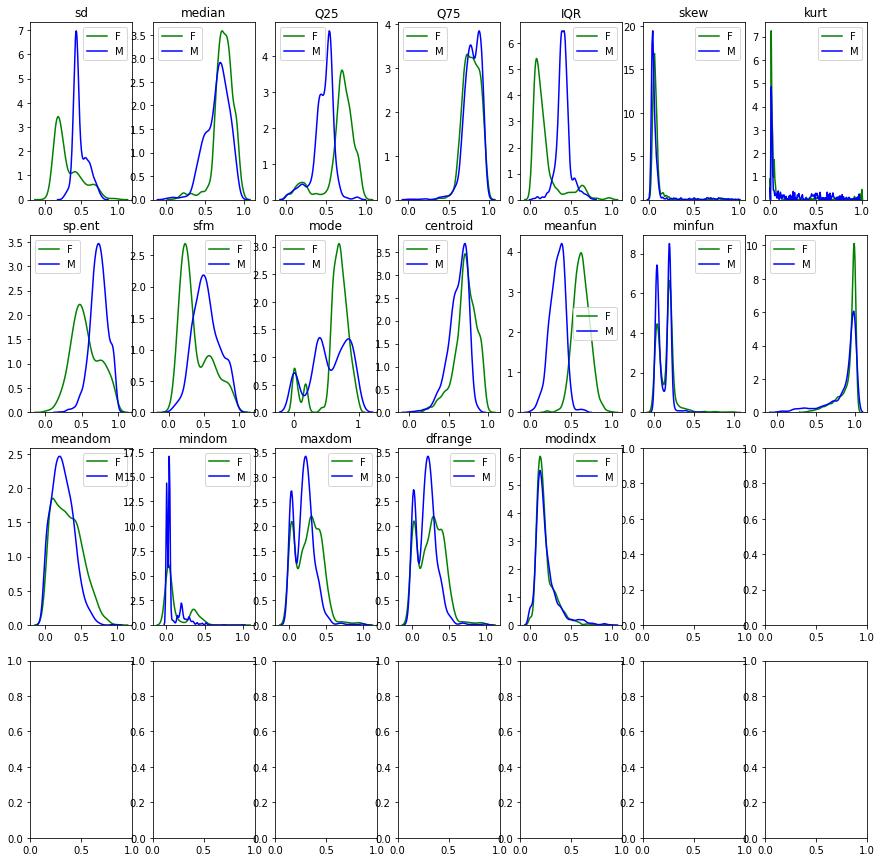

In [0]:
plt.subplots(4,7,figsize=(15,15))
for i in range(1,20):
    plt.subplot(4,7,i)
    plt.title(dtvoice.columns[i-1])
    sns.kdeplot(dtvoice.loc[dtvoice['label'] == 0, dtvoice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(dtvoice.loc[dtvoice['label'] == 1, dtvoice.columns[i-1]], color= 'blue', label='M')

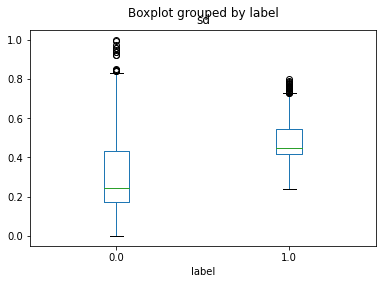

In [0]:
dtvoice.boxplot(column= 'sd', by='label', grid=False)


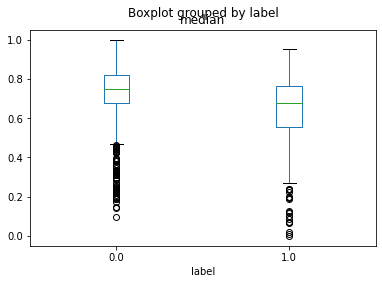

In [0]:
dtvoice.boxplot(column= 'median', by='label', grid=False)


##Process ML Models

In [0]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
##from sklearn.linear_model import Lasso
##from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score ##, KFold

Defining Train and Test Dataset

In [0]:
X_train = dtvoice.drop(["label"], axis=1)
y_train = dtvoice["label"]

In [0]:
X_train.shape

(3168, 19)

In [0]:
y_train.shape

(3168,)

Splitting Data into Validation set

In [0]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_test, y_training, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [0]:
##X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_training shape: ',X_training.shape)
print('y_training shape: ',y_training.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_training shape:  (2534, 19)
y_training shape:  (2534,)

Test cases as below
X_test shape:  (634, 19)
y_test shape:  (634,)


##DecisionTree

In [0]:
from sklearn.tree import DecisionTreeClassifier
mtree = DecisionTreeClassifier()
mtree.fit(X_training, y_training)
y_pred1 = mtree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))
trees =metrics.accuracy_score(y_test, y_pred1)

0.9526813880126183


## KNeighborsClassifier (KNN)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_training, y_training)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
knn = metrics.accuracy_score(y_test, y_pred)

0.9779179810725552


## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression
l_clf = LogisticRegression()
l_clf.fit(X_training,y_training)
l_prediction = l_clf.predict(X_test)

print(metrics.accuracy_score(y_test, l_prediction))
lreg =metrics.accuracy_score(y_test, l_prediction)

0.9652996845425867


##RandomForest 

In [0]:
# Build a Random Forest Classifier model.
# Import the 'RandomForestClassifier' module.
from sklearn.ensemble import RandomForestClassifier
# Import the confusion_matrix and classification_report modules.
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
# Predict the target variable based on the feature variables of the test DataFrame.
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rf_clf.fit(X_training, y_training)

##print(rf_clf.score(X_training, y_training))
y_predicted = rf_clf.predict(X_test)
y_predicted = pd.Series(y_predicted)

In [0]:
print(metrics.accuracy_score(y_test, y_predicted))
rdm = metrics.accuracy_score(y_test, y_predicted)

0.9842271293375394


In [0]:
y_predicted.value_counts()

1.0    333
0.0    301
dtype: int64

## Support Vector Machine Model

In [0]:
from sklearn.svm import SVC
#Train support vector machine model
svm = SVC().fit(X_training, y_training)
y_pred3 =svm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred3))
svmc =metrics.accuracy_score(y_test, y_pred3)

0.9810725552050473


##Model Evaluation

In [0]:
classifiers = ["Decision Tree", "Random Forest", "SVC","Logistic Regression"]
accuracy = np.array([trees, rdm, svmc,lreg])
max_acc = np.argmax(accuracy)
print(classifiers[max_acc] + "is the best classifier for this problem")

Random Forestis the best classifier for this problem


##Confusion Matrix & Classification Report

Printing the confusion matrix and classification report to evaluate the model with higest accuracy

In [0]:
# Print the confusion matrix to see the number of TN, FN, TP and FP values.
conmt = confusion_matrix(y_test,y_predicted)
conmt

array([[296,   5],
       [  5, 328]])

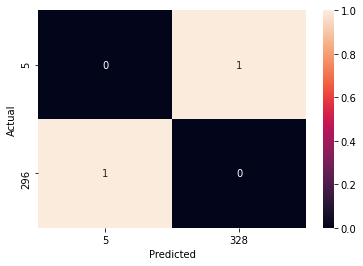

In [0]:
df = pd.DataFrame(conmt, columns=['y_test','y_predicted'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Interpretention of Confusion Matrix**


- Interpretation 1: values predicted as class 1 and are actually class 1=296

- Interpretation 2: values predicted as class 1 but actually belong to  class 0=5

- Interpretation 3:values predicted as class 0 and actually belong to  class 0=5
  
- Interpretation 4 : values predicted as class 0 but actually belong to  class 1=328


In [0]:
# Print the precision, recall and f1-score values for both the male and female classes.
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       301
         1.0       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Precision - Fraction of the correctly predicted positive (desired) values over the total predicted values.
Recall - Fraction of the correctly predicted positive (desired) values over the actual values.
F1-Score - The harmonic mean of the precision and recall values.


In [0]:
#Plot the variable importance
def plot_feature_importances_dtvoice(model):
    n_features = X_training.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(dtvoice))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")

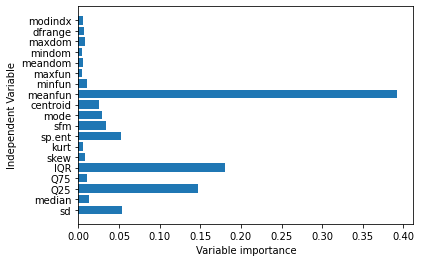

In [0]:
plot_feature_importances_dtvoice(rf_clf)

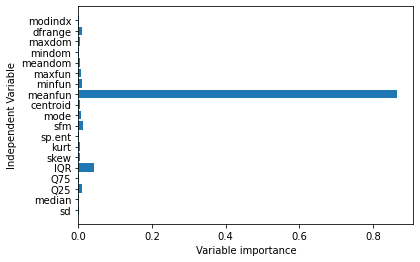

In [0]:
plot_feature_importances_dtvoice(mtree)